In [18]:
import Pkg
#Pkg.add("Distributions")
#Pkg.add("Plots")
#Pkg.add("Dierckx")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`


In [1]:
using Random, Distributions, Plots, Dierckx

In [2]:
#notional::Int
#number_of_capitalizations::Int
#bank_rate::Float64
#time_period::Float64 #1 year as reference
#tax::Float64
function savings_in_bank(notional::Int, number_of_capitalizations::Int, bank_rate::Float64, time_period::Float64,tax::Float64)
    Kₙ = notional*(1+(1-tax)*bank_rate/number_of_capitalizations)^(time_period*number_of_capitalizations)
    return Kₙ
end

savings_in_bank (generic function with 1 method)

In [3]:
#notional::Int
#number_of_capitalizations::Int
#usdt_rate::Float64
#time_period::Float64
#tax::Float64
#start_exchange_rate_USD_to_PLN::Float64
#end_exchange_rate_USD_to_PLN::Float64
function savings_in_usdt(notional::Int, number_of_capitalizations::Int, usdt_rate::Float64, time_period::Float64,tax::Float64,start_exchange_rate_USD_to_PLN::Float64,end_exchange_rate_USD_to_PLN::Float64)
    K = notional*1/start_exchange_rate_USD_to_PLN
    Kₙ = K*(1+usdt_rate/number_of_capitalizations)^(time_period*number_of_capitalizations)
    Kₙₚₗ = (K + (Kₙ - K)*(1-tax))*end_exchange_rate_USD_to_PLN
    return Kₙₚₗ
end

savings_in_usdt (generic function with 1 method)

In [4]:
sv_banks = savings_in_bank(10000,12,0.05,1.0,0.19)

10412.6030336168

In [5]:
savings_in_usdt(10000,365,0.1,1.0,0.19,3.0,3.0-0.12653)

10394.070689595483

In [6]:
rates = [i/1000 for i in 3000:5000]
differences = [i/1000 for i in 0:2000]
income_with_differences = savings_in_usdt.(10000,365,0.1,1.0,0.19,rates,rates+differences)
income_with_differences_on_minus = savings_in_usdt.(10000,365,0.1,1.0,0.19,rates,rates-differences)
bank_results = [sv_banks for i in 1:length(income_with_differences)]

2001-element Vector{Float64}:
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
     ⋮
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168
 10412.6030336168

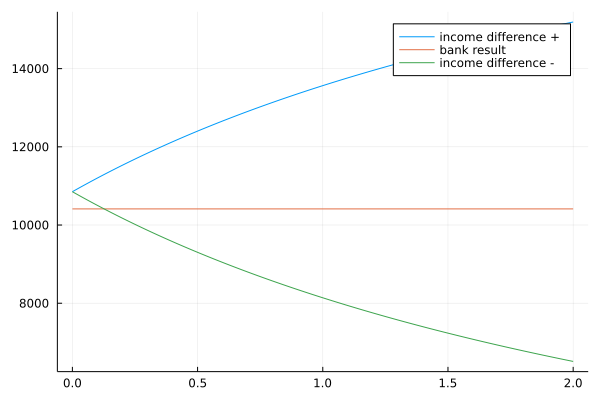

In [7]:
spl = Spline1D(differences, bank_results-income_with_differences_on_minus)
x0 = roots(spl)
y0 = Spline1D(differences,bank_results)(x0)
plot(differences,income_with_differences, labels="income difference +")
plot!(differences,bank_results,labels="bank result")
plot!(differences,income_with_differences_on_minus, labels="income difference -")
#scatter!(x0,y0,series_annotations = text(round(x0[1];digits = 5), font(11), :bottom))

In [8]:
w części raportu wyniki analizy odpowiedź powinna być w takim szablonie. 
Po przyprowadzeniu N symulacji wyszło, że w A% przypadków strategia Binance by się opłacała, ponieważ wylosowany kurs dolara był wyższy od granicznego kursu opłacalności który wynosi X zł. 
Do tego dobrze by było gdyby był histogram tych wylosowanych kursów walut i jakieś statystyki opisowe z których możnaby zrobić tabelkę, np. średni zarobek i odchylenie standardowe 
przy poziomie ufności 95%; 10% najlepszych, 10% najgorszych zarobków

LoadError: syntax: extra token "części" after end of expression

In [9]:
W analizie wrażliwość możemy założyć wybrane scenariusze:
Z uwagi na rosnącą inflację w Pl będzie rosło oprocentowanie:
0-4 miesiąc - 5%
5-8 miesiąc - 6.5%
9-12 miesiąc - 8%.
Reszta, czyli 10% na binance i 19% podatku od jednego i drugiego pozostaje bez zmian.

Jaki wtedy będzie odsetek tych realizacji w których Binance jest lepszy?

2. Rząd w ramach walki z inflacją chce jeszcze bardziej zachęcić do oszczędzania, żeby ściągnąć pieniądze z rynku i likwiduję podatek 19%, ale tylko dla lokat i kont oszczędnościowych. 
   A więc w banku jest teraz atrakcyjniej niż na Binance. W tym przypadku w banku dalej będzie 5%, a na binance 10%, ale podatek w banku to będzie 0%, a w binance na koniec roku zapłacimy 19% od odsetek. 
Jaki wtedy będzie odsetek tych realizacji w których Binance jest lepszy?

LoadError: syntax: extra token "analizie" after end of expression

In [10]:
----------------------------------------------------------------- podstawowe symulacje ---------------------------------------------------------
1) zrobić N symulacji ze zmienną kurs
2) zebrać statystyki z z symulacji, to jest:
    a) kursy
    b) zysk
    c) na jaki dzień

----------------------------------------------------------------- analiza wrażliwości -----------------------------------------------------------
3) oprocentowanie na lokacie bankowej zmienia się w czasie,binance - stały, podatek - stały => co będzie lepsze
4) brak podatku dla lokat i kont oszczędnościowych, oprocentowanie - stałe, binance - bez zmian

LoadError: syntax: invalid operator "--"

In [140]:
function basic_scenario(num_of_iterations::Int, notional::Int, number_of_capitalizations_bank::Int, bank_rate::Float64,tax_bank::Float64,number_of_capitalizations_usdt::Int, usdt_rate::Float64, time_period::Float64,tax_usdt::Float64, start_exchange_rate_USD_to_PLN::Float64)
    Random.seed!(1)
    stats = zeros(Float64,num_of_iterations,4)
    d = TriangularDist(3.3,5.0,4.0)
    stats[:,1].+= start_exchange_rate_USD_to_PLN
    stats[:,2].+= rand(d,num_of_iterations)
    stats[:,3].+= savings_in_bank(notional, number_of_capitalizations_bank, bank_rate, time_period,tax_bank)
    stats[:,4].+= savings_in_usdt.(notional, number_of_capitalizations_usdt, usdt_rate,time_period,tax_usdt,start_exchange_rate_USD_to_PLN,stats[:,2])
    return stats #4 columns - 1. usd->pln start date, 2. usd->pln end date, 3. savings in bank, savings in usdt
end

basic_scenario (generic function with 1 method)

In [222]:
function basic_scenario_takes_income(income::Float64,num_of_iterations::Int, notional::Int64, number_of_capitalizations_usdt::Int, usdt_rate::Float64, time_period::Float64,tax_usdt::Float64, start_exchange_rate_USD_to_PLN::Float64)
    Random.seed!(1)
    stats = zeros(Float64,num_of_iterations,4)
    d = TriangularDist(3.3,5.0,4.0)
    stats[:,1].+= start_exchange_rate_USD_to_PLN
    stats[:,2].+= rand(d,num_of_iterations)
    stats[:,3].+= income
    stats[:,4].+= savings_in_usdt.(notional, number_of_capitalizations_usdt, usdt_rate,time_period,tax_usdt,start_exchange_rate_USD_to_PLN,stats[:,2])
    return stats #4 columns - 1. usd->pln start date, 2. usd->pln end date, 3. savings in bank, savings in usdt
end

basic_scenario_takes_income (generic function with 4 methods)

In [218]:
basic_scenario_results = basic_scenario(1000,100,12,0.05,0.19,365,0.1,1.0,0.19,4.0)

1000×4 Matrix{Float64}:
 4.0  3.59548  104.126   97.5431
 4.0  3.94467  104.126  107.017
 4.0  4.28446  104.126  116.235
 4.0  4.20505  104.126  114.08
 4.0  4.61971  104.126  125.33
 4.0  3.779    104.126  102.522
 4.0  4.37495  104.126  118.69
 4.0  4.38917  104.126  119.075
 4.0  4.2513   104.126  115.335
 4.0  3.74674  104.126  101.647
 4.0  4.1461   104.126  112.481
 4.0  4.03552  104.126  109.481
 4.0  3.89981  104.126  105.799
 ⋮                      
 4.0  4.65716  104.126  126.346
 4.0  4.15813  104.126  112.808
 4.0  3.98837  104.126  108.202
 4.0  3.81964  104.126  103.625
 4.0  4.38837  104.126  119.054
 4.0  3.69719  104.126  100.303
 4.0  4.53742  104.126  123.097
 4.0  3.89682  104.126  105.718
 4.0  4.09576  104.126  111.115
 4.0  3.95101  104.126  107.188
 4.0  4.60494  104.126  124.929
 4.0  4.23292  104.126  114.837

In [254]:
function which_is_better(matrix::Matrix{Float64})
    usdt_better_than_bank = sum(matrix[:,4] .> matrix[:,3]) #when revenue usdt>bank
    return usdt_better_than_bank/size(matrix,1)
end

which_is_better (generic function with 1 method)

In [15]:
which_is_better(basic_scenario_results)

0.718

In [158]:
function plot_histogram(matrix::Matrix{Float64})
    index = findmin(abs.(matrix[:,3] .- matrix[:,4]))[2]
    x = matrix[index,2]
    histogram(matrix[:,2],bins=:20,labels="end_date")
    vline!([x], labels = "threshold")
end

plot_histogram (generic function with 1 method)

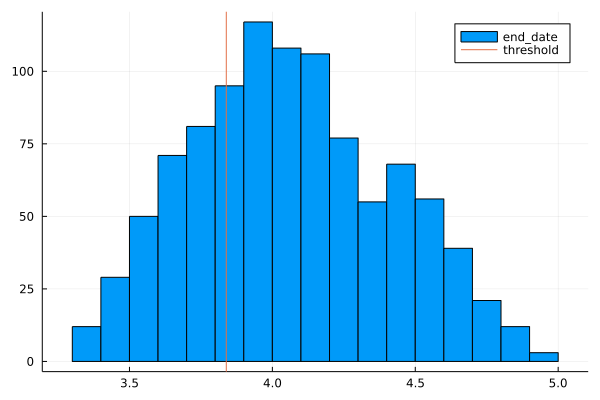

In [159]:
plot_histogram(basic_scenario_results) # interpretacja treshold - jeżeli kurs jest na lewo to strata

In [48]:
# jeżeli będziecie chcieli użyć tej funkcji wielokrotnie to warto posortować macierz przed funkcją (przed np. forem) i do funkcji dać uporządkowaną macierz - wtedy warto też usunąć sortowanie z funkcji 
# (pierwszą linijkę)
function get_usdt_result(qt::Int64,results::Matrix{Float64}) 
    Nprct = sort(results[:,4])
    ln = length(Nprct)
    qtn = Nprct[Int(ln/100*qt)]
    return mean(Nprct), std(Nprct), qtn
end

get_usdt_result (generic function with 2 methods)

In [47]:
get_usdt_result(, basic_scenario_results)

(110.23081949827431, 9.442421994179044, 109.62928835251329)

In [20]:
3) Oprocentowanie w banku się zmienia

LoadError: syntax: extra token ")" after end of expression

In [244]:
function bank_floating_rate(schdl::Vector{Vector{Float64}},notional::Float64,tax::Float64)
    schedule = reduce(vcat,[fill(a[2],Int(a[1])) for a in schdl])
    cap = sum(i[1] for i in schdl)
    Kₙ = notional
    for i in schedule
        Kₙ += Kₙ*i/cap*(1-tax)
    end
    return Kₙ
end

bank_floating_rate (generic function with 4 methods)

In [253]:
schdl = [[12,0.05],[4,0.065],[3,0.08]]
a=bank_floating_rate(schdl,100.0,0.19,)

104.79488491334095

In [247]:
bank_income = bank_floating_rate(schdl,10000.0,0.19)

10479.488491334101

In [251]:
#income::Float64,num_of_iterations::Int, notional::Float64, number_of_capitalizations_usdt::Int, usdt_rate::Float64, time_period::Float64,tax_usdt::Float64, start_exchange_rate_USD_to_PLN::Float64
floating_rate_sim = basic_scenario_takes_income(bank_income,100, 10000, 365, 0.1, 1.0,0.19, 4.0)

100×4 Matrix{Float64}:
 4.0  3.59548  10479.5   9754.31
 4.0  3.94467  10479.5  10701.7
 4.0  4.28446  10479.5  11623.5
 4.0  4.20505  10479.5  11408.0
 4.0  4.61971  10479.5  12533.0
 4.0  3.779    10479.5  10252.2
 4.0  4.37495  10479.5  11869.0
 4.0  4.38917  10479.5  11907.5
 4.0  4.2513   10479.5  11533.5
 4.0  3.74674  10479.5  10164.7
 4.0  4.1461   10479.5  11248.1
 4.0  4.03552  10479.5  10948.1
 4.0  3.89981  10479.5  10579.9
 ⋮                      
 4.0  3.84149  10479.5  10421.7
 4.0  4.01186  10479.5  10883.9
 4.0  4.06928  10479.5  11039.7
 4.0  3.9453   10479.5  10703.4
 4.0  4.59797  10479.5  12474.0
 4.0  4.26285  10479.5  11564.9
 4.0  4.44658  10479.5  12063.3
 4.0  4.69433  10479.5  12735.4
 4.0  4.00024  10479.5  10852.4
 4.0  4.81291  10479.5  13057.2
 4.0  4.46854  10479.5  12122.9
 4.0  4.82364  10479.5  13086.2

In [255]:
which_is_better(floating_rate_sim)

0.8

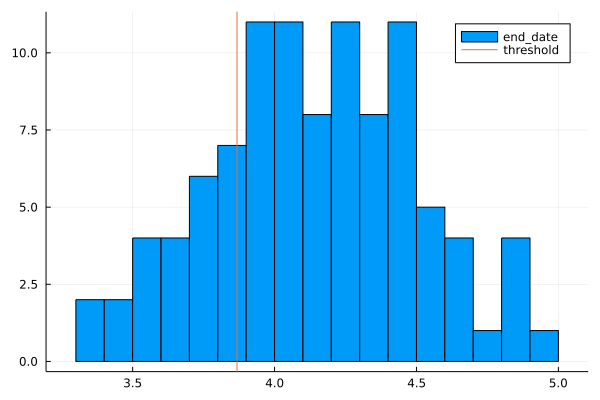

In [256]:
plot_histogram(floating_rate_sim)